# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import json
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import math
%matplotlib inline
import seaborn as sns
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno
import re
import glob
import os

from scipy import stats
from scipy.integrate import trapz

import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', 10, 'max_rows', 5, 'max_colwidth', 10)

In [2]:
# 전처리
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

# 알고리즘(군집)
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth # 최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

## 평가
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 불러오기

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X_features = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
X_origin_df = X_features.copy()
X_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
...,...,...,...,...
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


## 전처리

### Scaler

In [4]:
# 표준화
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

# 표준화 후 데이터 프레임으로 변경
X_features = pd.DataFrame(X_features)
X_features.columns = X_origin_df.columns
X_features

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
...,...,...,...,...
148,0.432165,0.788808,0.933271,1.448832
149,0.068662,-0.131979,0.762758,0.790671


In [5]:
# MinMax
scaler = MinMaxScaler()
X_features = scaler.fit_transform(X_features)

# 표준화 후 데이터 프레임으로 변경
X_features = pd.DataFrame(X_features)
X_features.columns = X_origin_df.columns
X_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
...,...,...,...,...
148,0.527778,0.583333,0.745763,0.916667
149,0.444444,0.416667,0.694915,0.708333


In [6]:
# Log1p
X_features = np.log1p(X_features)
X_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.200671,0.485508,0.065597,0.040822
1,0.154151,0.348307,0.065597,0.040822
...,...,...,...,...
148,0.423814,0.459532,0.557192,0.650588
149,0.367725,0.348307,0.527633,0.535518


### PCA를 활용한 x, y 좌표값 추출

In [7]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)

X_features['pca_x'] = pca_transformed[:,0]
X_features['pca_y'] = pca_transformed[:,1]
X_features.head(3)

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y
0,0.200671,0.485508,0.065597,0.040822,0.464162,-0.074685
1,0.154151,0.348307,0.065597,0.040822,0.462762,0.068538
2,0.105361,0.405465,0.049597,0.040822,0.501531,0.038178


# 계층적 군집화(군집수 구하기)

In [8]:
X_features

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y
0,0.200671,0.485508,0.065597,0.040822,0.464162,-0.074685
1,0.154151,0.348307,0.065597,0.040822,0.462762,0.068538
...,...,...,...,...,...,...
148,0.423814,0.459532,0.557192,0.650588,-0.332689,-0.109817
149,0.367725,0.348307,0.527633,0.535518,-0.233212,0.010847


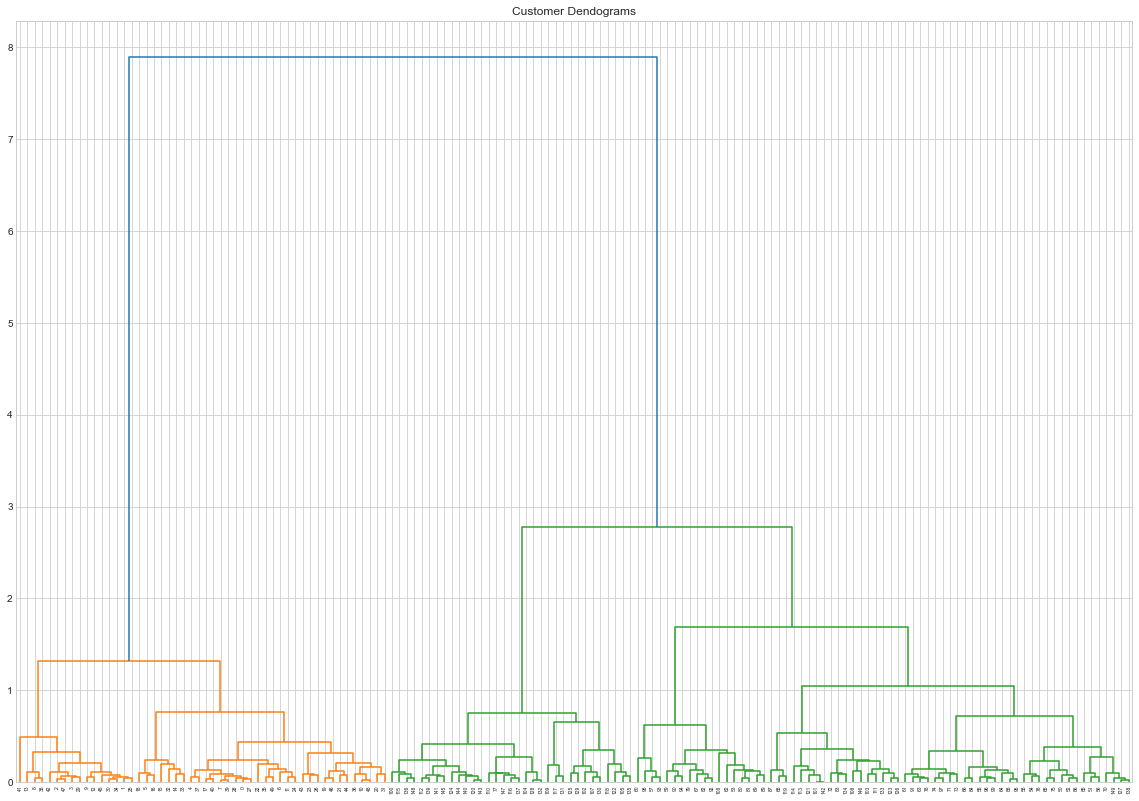

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 14))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_features, method='ward'))

# 머신러닝 모델 만들기(비계층적 군집화)

## Kmeans

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans_cluster_labels = kmeans.fit_predict(X_features)
# X_df['kmeans_cluster_label'] = kmeans_cluster_labels
X_features['kmeans_cluster_label'] = kmeans.labels_

In [11]:
print('군집 유형 :',np.unique((kmeans.labels_)), '\n')
print(kmeans.labels_)

# kmeans.fit(X_origin_df)
# kmeans.predict(X_origin_df)

군집 유형 : [0 1 2] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1]


In [12]:
X_features

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y,kmeans_cluster_label
0,0.200671,0.485508,0.065597,0.040822,0.464162,-0.074685,0
1,0.154151,0.348307,0.065597,0.040822,0.462762,0.068538,0
...,...,...,...,...,...,...,...
148,0.423814,0.459532,0.557192,0.650588,-0.332689,-0.109817,1
149,0.367725,0.348307,0.527633,0.535518,-0.233212,0.010847,1


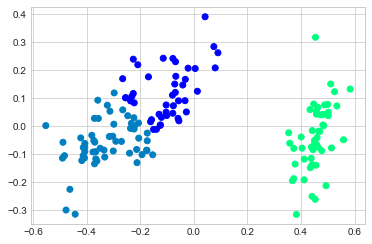

In [13]:
plt.scatter(x=X_features.loc[:, 'pca_x'], y=X_features.loc[:, 'pca_y'], c=X_features['kmeans_cluster_label'],
           cmap = 'winter_r') 

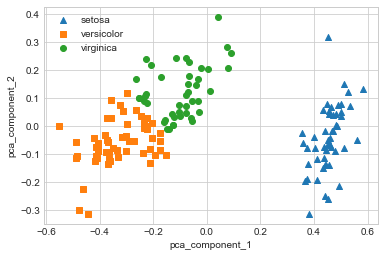

In [14]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
# markers=['o', 's', '^', 'x', '*']
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = X_features[X_features['kmeans_cluster_label']==i]['pca_x']
    y_axis_data = X_features[X_features['kmeans_cluster_label']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## Mean Shift

In [15]:
meanshift= MeanShift(bandwidth=1.211)
meanshift_cluster_labels = meanshift.fit_predict(X_features)
X_features['meanshift_cluster_label'] = meanshift_cluster_labels

In [16]:
print('군집 유형 :', np.unique((meanshift.labels_)), '\n')
print(meanshift.labels_)

# meanshift.fit(X_origin_df)
# meanshift.predict(X_origin_df)

군집 유형 : [0 1] 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [17]:
bandwidth = estimate_bandwidth(X_features, quantile=0.25)
# bandwidth = estimate_bandwidth(X_df,quantile=0.25)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 0.308


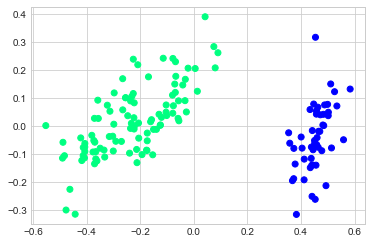

In [18]:
plt.scatter(x=X_features.loc[:, 'pca_x'], y=X_features.loc[:, 'pca_y'], c=X_features['meanshift_cluster_label'],
           cmap='winter_r') 

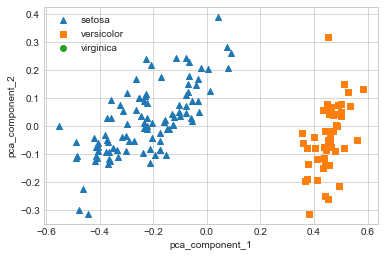

In [19]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = X_features[X_features['meanshift_cluster_label']==i]['pca_x']
    y_axis_data = X_features[X_features['meanshift_cluster_label']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## GaussianMixture

In [20]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_cluster_labels = gmm.fit_predict(X_features)
X_features['gmm_cluster_label'] = gmm_cluster_labels

In [21]:
print('군집 유형 :', np.unique((gmm.labels_)), '\n')
print(gmm.labels_)

# gmm.fit(X_origin_df)
# gmm.predict(X_origin_df)

AttributeError: 'GaussianMixture' object has no attribute 'labels_'

In [ ]:
plt.scatter(x=X_features.loc[:, 'pca_x'], y=X_features.loc[:, 'pca_y'], c=X_features['gmm_cluster_label'],
           cmap='winter_r') 

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = X_features[X_features['gmm_cluster_label']==i]['pca_x']
    y_axis_data = X_features[X_features['gmm_cluster_label']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_features)
X_features['dbscan_cluster_label'] = dbscan_labels

In [ ]:
print('군집 유형 :',np.unique((dbscan.labels_)), '\n')
print(dbscan.labels_)

# dbscan.fit(X_origin_df)
# dbscan.predict(X_origin_df))

In [ ]:
plt.scatter(x=X_features.loc[:, 'pca_x'], y=X_features.loc[:, 'pca_y'], c=X_features['dbscan_cluster_label'],
           cmap='winter_r') 

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = X_features[X_features['dbscan_cluster_label']==i]['pca_x']
    y_axis_data = X_features[X_features['dbscan_cluster_label']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 평가

## 분류처럼 결과값이 있을 경우 비교(군집화는 원래 없다)

In [ ]:
# 타겟 은 실제 타겟이랑 비교하는 것으로 원래는 가지고 있지 않은 것이다.
X_features['target'] = iris.target
iris_result = X_features.groupby(['target','cluster_label'])['sepal_length'].count()
print(iris_result)

## 실루엣계수 평가

In [ ]:
algo_col_list = ['kmeans_cluster_label', 'meanshift_cluster_label',
                 'gmm_cluster_label', 'dbscan_cluster_label']

for col in algo_col_list:
    print(col)
    print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_origin_df, X_features[col])))
    print('-------------------------------------------------------------------------------------------------\n')

## 2차원 시각화 평가 1

In [22]:
# if 'cluster_label' in X_df.columns:
#     X_df.drop('cluster_label', axis=1, inplace=True)
# if 'target' in X_df.columns:
#     X_df.drop('target', axis=1, inplace=True)

In [23]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

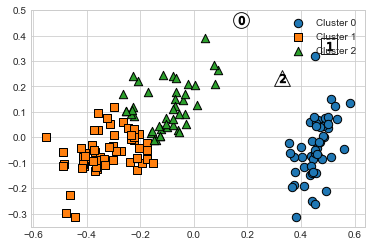

In [24]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
# kmeans = KMeans(3, random_state=0)
# kmeans_label = kmeans.fit_predict(X_aniso)
# X_df['kmeans_cluster_label'] = kmeans_label

visualize_cluster_plot(kmeans, X_features, 'kmeans_cluster_label',iscenter=True)

# 추가 시각화 평가

### 실루엣계수 시각화 평가

In [25]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

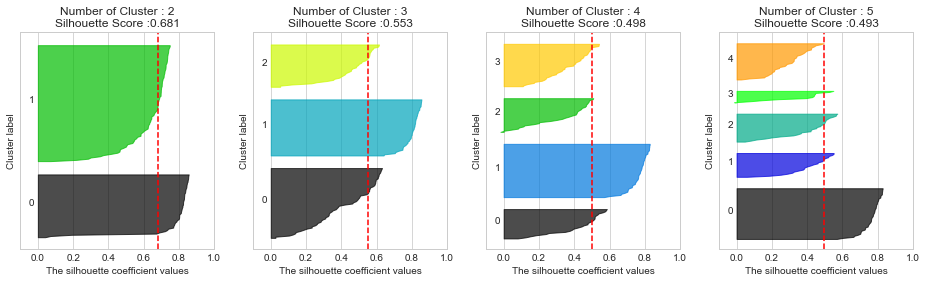

In [26]:
visualize_silhouette([2,3,4,5],X_origin_df)

### 2차원 시각화 평가 3

In [27]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_cluster_plot_multi(cluster_lists, X_features):
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

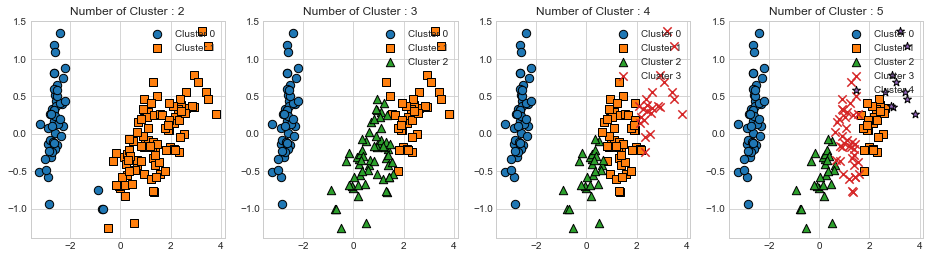

In [28]:
visualize_cluster_plot_multi([2,3,4,5], X_origin_df)